In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1.0,0.0,1.0,5.52,0.0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33064 entries, 0 to 33063
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         33064 non-null  int64  
 1   sales_channel          33064 non-null  object 
 2   trip_type              33064 non-null  object 
 3   purchase_lead          33064 non-null  int64  
 4   length_of_stay         33064 non-null  int64  
 5   flight_hour            33064 non-null  int64  
 6   flight_day             33064 non-null  object 
 7   route                  33064 non-null  object 
 8   booking_origin         33064 non-null  object 
 9   wants_extra_baggage    33063 non-null  float64
 10  wants_preferred_seat   33063 non-null  float64
 11  wants_in_flight_meals  33063 non-null  float64
 12  flight_duration        33063 non-null  float64
 13  booking_complete       33063 non-null  float64
dtypes: float64(5), int64(4), object(5)
memory usage: 3.5+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

data["flight_day"] = data["flight_day"].map(mapping)

In [8]:
data["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [9]:
data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,33064.000000,33064.000000,33064.000000,33064.000000,33064.000000,33063.000000,33063.000000,33063.000000,33063.000000,33063.000000
mean,1.471691,81.155002,32.109969,8.953182,3.810338,0.710734,0.302060,0.455827,7.499198,0.123794
std,0.881262,85.790123,38.649047,5.448862,1.984817,0.453428,0.459158,0.498052,1.484426,0.329351
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,20.000000,17.000000,5.000000,2.000000,0.000000,0.000000,0.000000,6.330000,0.000000
50%,1.000000,50.000000,23.000000,9.000000,4.000000,1.000000,0.000000,0.000000,8.580000,0.000000
75%,2.000000,111.000000,35.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,704.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Preprocessing the dataset

In [10]:
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      1
wants_preferred_seat     1
wants_in_flight_meals    1
flight_duration          1
booking_complete         1
dtype: int64

In [11]:
data['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [12]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1.0,0.0,1.0,5.52,0.0


In [13]:
map1={'Internet':1,
     'Mobile':2}
data['sales_channel']=data['sales_channel'].map(map1)

In [20]:
data['route'].nunique()

741

Route feature is of High cardinality  which reduce the predictive power of the model and also increase the complexity of the model to integrate with the patterns in the data which significantly increase the computational cost of the model too. ('DEF REMOVABLE FEATURE")

In [19]:
data['booking_origin'].nunique()

97

Booking origin feature also contains a high cardinality  which significantly reduce the model performance but the feature can also be a  imporant  feature which helps to predict the flagged therefore further analysis in data visualization helps us to decide whether to remove the feature or not.
("NOT SURE OF REMOVING")

In [21]:
data['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [23]:
map2={
    'OneWay':0,
    'RoundTrip':1,
    'CircleTrip':2
}

data['trip_type']=data['trip_type'].map(map2)

In [24]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0
2,2,1,1,243,22,17,3,AKLDEL,India,1.0,1.0,0.0,5.52,0.0
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0
4,2,1,1,68,22,15,3,AKLDEL,India,1.0,0.0,1.0,5.52,0.0


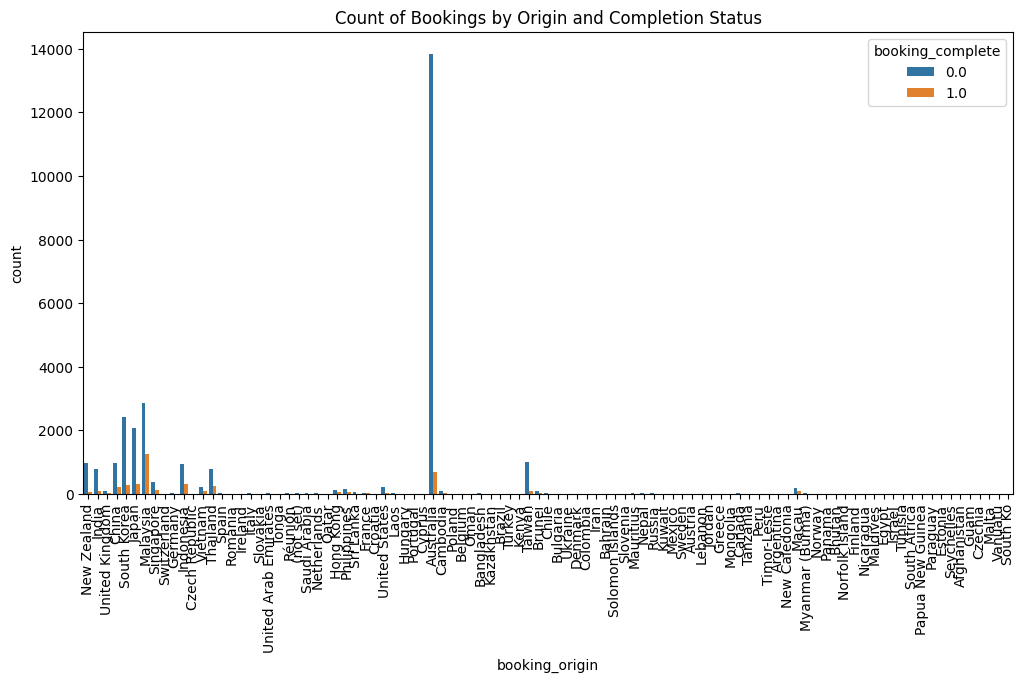

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='booking_origin', hue='booking_complete', data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title('Count of Bookings by Origin and Completion Status')
plt.show()

In [37]:
successful_bookings = data[data['booking_complete'] == 1]
top_countries = successful_bookings['booking_origin'].value_counts().nlargest(15)

In [38]:
top_countries

Malaysia       1261
Australia       688
Indonesia       316
Japan           295
South Korea     263
Thailand        233
China           217
Singapore       126
Taiwan           94
India            89
Vietnam          82
Macau            81
Philippines      56
Hong Kong        44
New Zealand      43
Name: booking_origin, dtype: int64

In [42]:
data['booking_from_top15_countries']=data['booking_origin'].apply(lambda x:1 if x in top_countries else 0)


In [43]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1.0,0.0,0.0,5.52,0.0,1
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0.0,0.0,0.0,5.52,0.0,1
2,2,1,1,243,22,17,3,AKLDEL,India,1.0,1.0,0.0,5.52,0.0,1
3,1,1,1,96,31,4,6,AKLDEL,New Zealand,0.0,0.0,1.0,5.52,0.0,1
4,2,1,1,68,22,15,3,AKLDEL,India,1.0,0.0,1.0,5.52,0.0,1


In [ ]:
data.drop('booking_origin',axis=1,inplace=True)

In [47]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries
0,2,1,1,262,19,7,6,AKLDEL,1.0,0.0,0.0,5.52,0.0,1
1,1,1,1,112,20,3,6,AKLDEL,0.0,0.0,0.0,5.52,0.0,1
2,2,1,1,243,22,17,3,AKLDEL,1.0,1.0,0.0,5.52,0.0,1
3,1,1,1,96,31,4,6,AKLDEL,0.0,0.0,1.0,5.52,0.0,1
4,2,1,1,68,22,15,3,AKLDEL,1.0,0.0,1.0,5.52,0.0,1


In [60]:
top_routes=successful_bookings['route'].value_counts().nlargest(5)

In [61]:
top_routes

AKLKUL    418
JHBKTM    164
PENTPE    117
KTMPEN    114
DMKKIX     81
Name: route, dtype: int64

In [62]:
data['Top_5_route_travelled']=data['route'].apply(lambda x:1 if x in top_routes else 0)

In [63]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries,Top_5_route_travelled
0,2,1,1,262,19,7,6,AKLDEL,1.0,0.0,0.0,5.52,0.0,1,0
1,1,1,1,112,20,3,6,AKLDEL,0.0,0.0,0.0,5.52,0.0,1,0
2,2,1,1,243,22,17,3,AKLDEL,1.0,1.0,0.0,5.52,0.0,1,0
3,1,1,1,96,31,4,6,AKLDEL,0.0,0.0,1.0,5.52,0.0,1,0
4,2,1,1,68,22,15,3,AKLDEL,1.0,0.0,1.0,5.52,0.0,1,0


In [64]:
data.drop('route',axis=1,inplace=True)

In [65]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries,Top_5_route_travelled
0,2,1,1,262,19,7,6,1.0,0.0,0.0,5.52,0.0,1,0
1,1,1,1,112,20,3,6,0.0,0.0,0.0,5.52,0.0,1,0
2,2,1,1,243,22,17,3,1.0,1.0,0.0,5.52,0.0,1,0
3,1,1,1,96,31,4,6,0.0,0.0,1.0,5.52,0.0,1,0
4,2,1,1,68,22,15,3,1.0,0.0,1.0,5.52,0.0,1,0


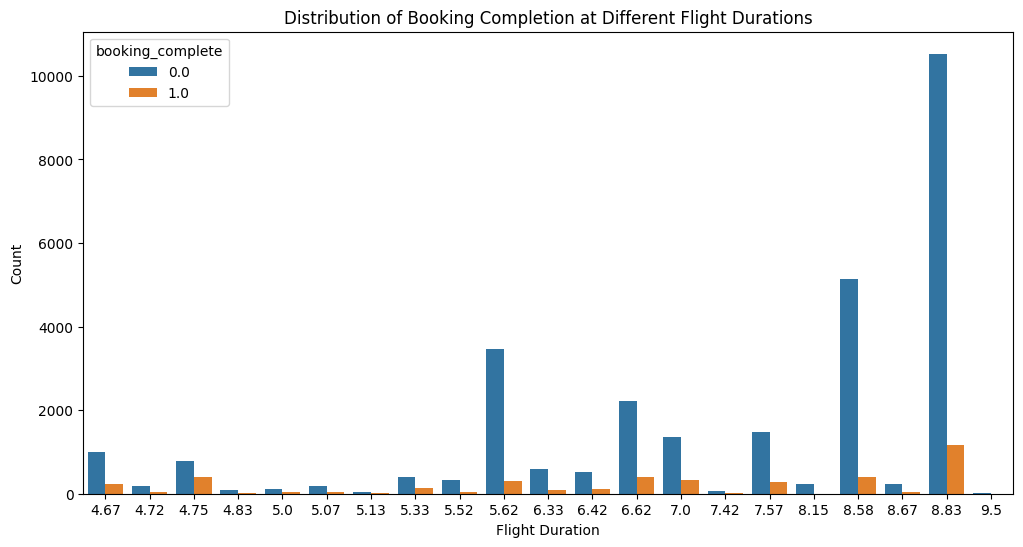

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(x='flight_duration', hue='booking_complete', data=data)
plt.xlabel('Flight Duration')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion at Different Flight Durations')
plt.show()

  Therefore it doesnt provide any relation for completion of booking
  

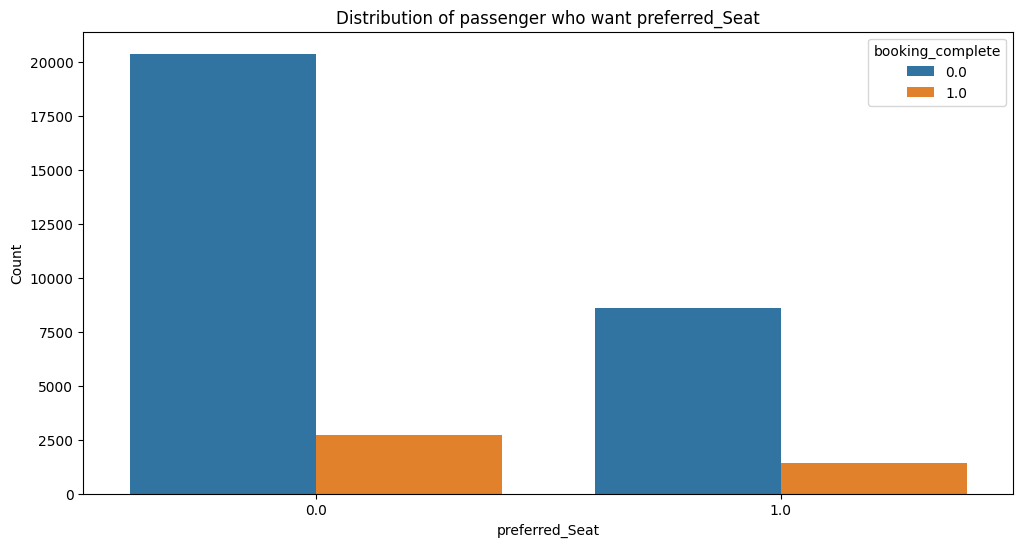

In [68]:
plt.figure(figsize=(12, 6))
sns.countplot(x='wants_preferred_seat', hue='booking_complete', data=data)
plt.xlabel('preferred_Seat')
plt.ylabel('Count')
plt.title('Distribution of passenger who want preferred_Seat')
plt.show()

No relation

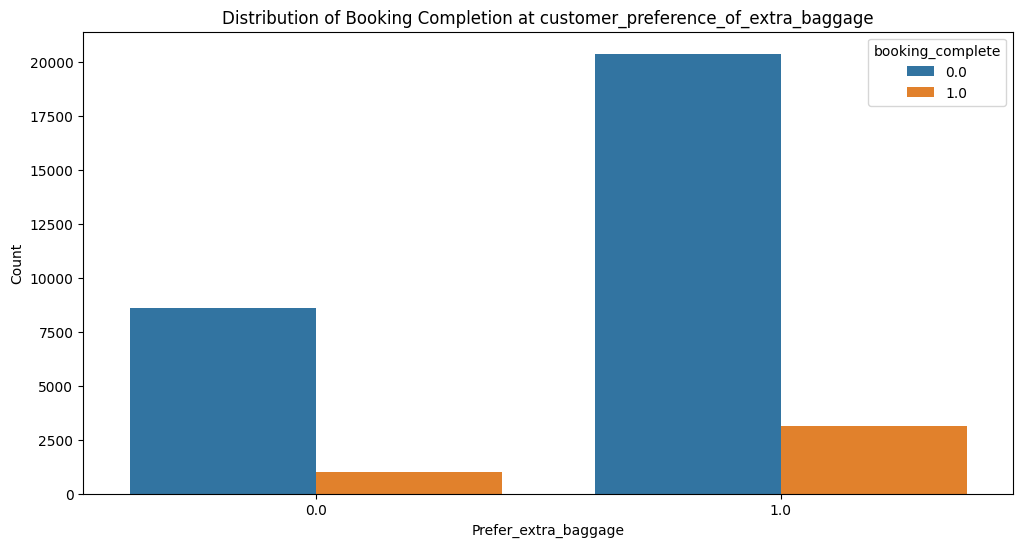

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(x='wants_extra_baggage', hue='booking_complete', data=data)
plt.xlabel('Prefer_extra_baggage')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion at customer_preference_of_extra_baggage')
plt.show()

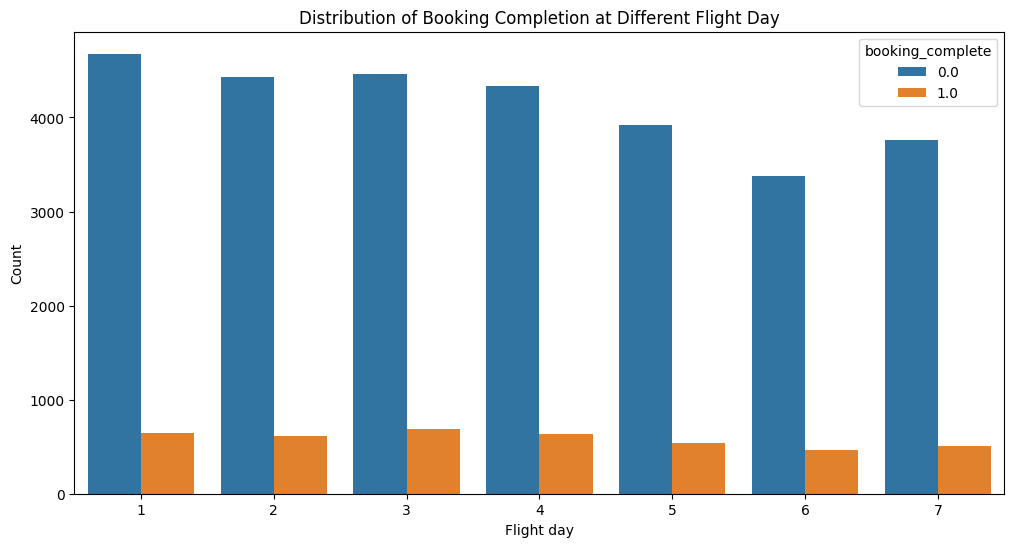

In [70]:
plt.figure(figsize=(12, 6))
sns.countplot(x='flight_day', hue='booking_complete', data=data)
plt.xlabel('Flight day')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion at Different Flight Day')
plt.show()

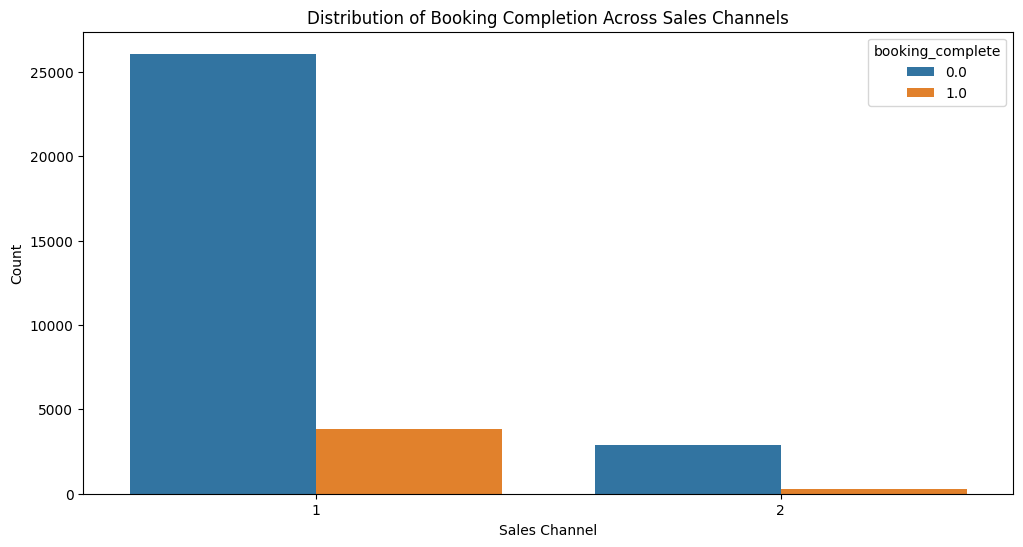

In [75]:


plt.figure(figsize=(12, 6))
sns.countplot(x='sales_channel', hue='booking_complete', data=data)
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion Across Sales Channels')
plt.show()



booking via internet has a alot successful booking compartively


In [76]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries,Top_5_route_travelled
0,2,1,1,262,19,7,6,1.0,0.0,0.0,5.52,0.0,1,0
1,1,1,1,112,20,3,6,0.0,0.0,0.0,5.52,0.0,1,0
2,2,1,1,243,22,17,3,1.0,1.0,0.0,5.52,0.0,1,0
3,1,1,1,96,31,4,6,0.0,0.0,1.0,5.52,0.0,1,0
4,2,1,1,68,22,15,3,1.0,0.0,1.0,5.52,0.0,1,0


In [79]:
data['length_of_stay'].nunique()


333

In [86]:
top_lengthofstay_chosen=successful_bookings['length_of_stay'].value_counts().nlargest(10)

In [87]:
top_lengthofstay_chosen

4     637
3     506
17    197
2     154
18    139
19    133
20    131
21    130
22    110
23     94
Name: length_of_stay, dtype: int64

In [88]:
data['top10_preferred_length_of_stay']=data['length_of_stay'].apply(lambda x:1 if x in top_lengthofstay_chosen else 0)

In [89]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries,Top_5_route_travelled,top10_preferred_length_of_stay
0,2,1,1,262,19,7,6,1.0,0.0,0.0,5.52,0.0,1,0,1
1,1,1,1,112,20,3,6,0.0,0.0,0.0,5.52,0.0,1,0,1
2,2,1,1,243,22,17,3,1.0,1.0,0.0,5.52,0.0,1,0,1
3,1,1,1,96,31,4,6,0.0,0.0,1.0,5.52,0.0,1,0,0
4,2,1,1,68,22,15,3,1.0,0.0,1.0,5.52,0.0,1,0,1


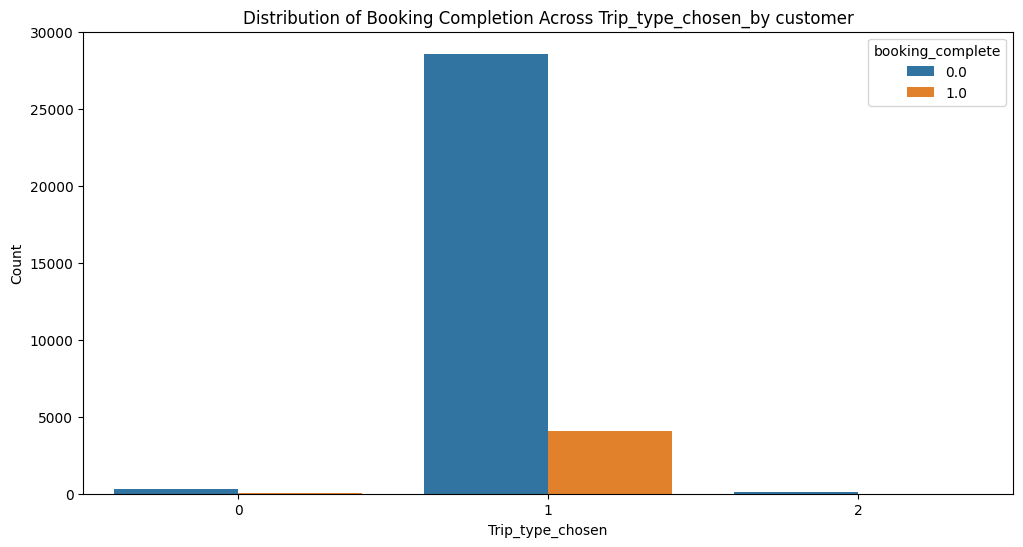

In [91]:

plt.figure(figsize=(12, 6))
sns.countplot(x='trip_type', hue='booking_complete', data=data)
plt.xlabel('Trip_type_chosen')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion Across Trip_type_chosen_by customer')
plt.show()

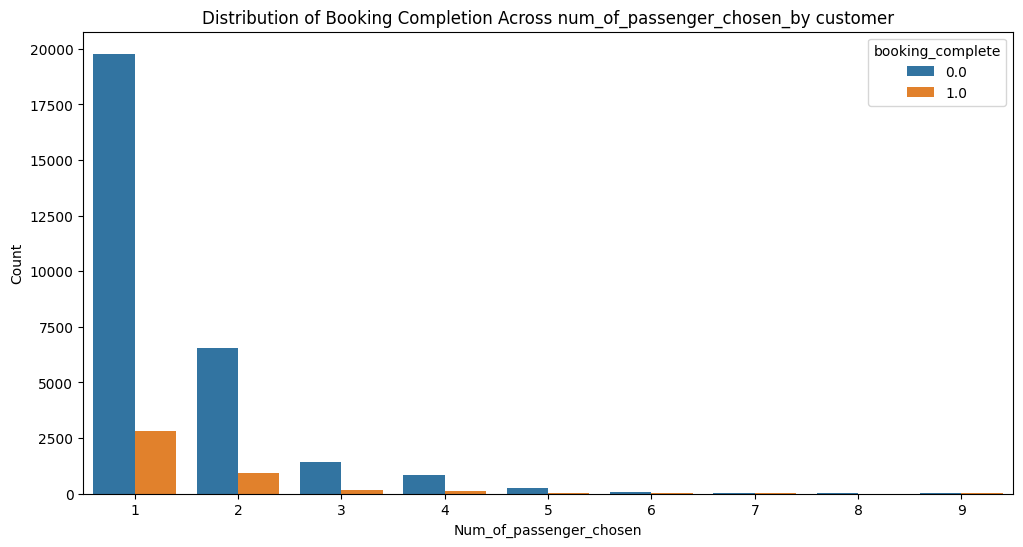

In [94]:

plt.figure(figsize=(12, 6))
sns.countplot(x='num_passengers', hue='booking_complete', data=data)
plt.xlabel('Num_of_passenger_chosen')
plt.ylabel('Count')
plt.title('Distribution of Booking Completion Across num_of_passenger_chosen_by customer')
plt.show()

In [95]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries,Top_5_route_travelled,top10_preferred_length_of_stay
0,2,1,1,262,19,7,6,1.0,0.0,0.0,5.52,0.0,1,0,1
1,1,1,1,112,20,3,6,0.0,0.0,0.0,5.52,0.0,1,0,1
2,2,1,1,243,22,17,3,1.0,1.0,0.0,5.52,0.0,1,0,1
3,1,1,1,96,31,4,6,0.0,0.0,1.0,5.52,0.0,1,0,0
4,2,1,1,68,22,15,3,1.0,0.0,1.0,5.52,0.0,1,0,1


In [96]:
data['flight_hour_bin'] = pd.cut(data['flight_hour'], bins=3, labels=['morning', 'afternoon', 'evening'])



In [97]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries,Top_5_route_travelled,top10_preferred_length_of_stay,flight_hour_bin
0,2,1,1,262,19,7,6,1.0,0.0,0.0,5.52,0.0,1,0,1,morning
1,1,1,1,112,20,3,6,0.0,0.0,0.0,5.52,0.0,1,0,1,morning
2,2,1,1,243,22,17,3,1.0,1.0,0.0,5.52,0.0,1,0,1,evening
3,1,1,1,96,31,4,6,0.0,0.0,1.0,5.52,0.0,1,0,0,morning
4,2,1,1,68,22,15,3,1.0,0.0,1.0,5.52,0.0,1,0,1,afternoon


In [99]:
map4={
    'morning':0,
    'afternoon':1,
    'evening':2
}
data['flight_hour_bin']=data['flight_hour_bin'].map(map4)

In [100]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_from_top15_countries,Top_5_route_travelled,top10_preferred_length_of_stay,flight_hour_bin
0,2,1,1,262,19,7,6,1.0,0.0,0.0,5.52,0.0,1,0,1,0
1,1,1,1,112,20,3,6,0.0,0.0,0.0,5.52,0.0,1,0,1,0
2,2,1,1,243,22,17,3,1.0,1.0,0.0,5.52,0.0,1,0,1,2
3,1,1,1,96,31,4,6,0.0,0.0,1.0,5.52,0.0,1,0,0,0
4,2,1,1,68,22,15,3,1.0,0.0,1.0,5.52,0.0,1,0,1,1


In [113]:
data=data.dropna()

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
features = [
   'num_passengers','sales_channel','trip_type','purchase_lead',
    'length_of_stay','flight_hour','flight_day','wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals','flight_duration','booking_from_top15_countries'
    ,'Top_5_route_travelled','top10_preferred_length_of_stay','flight_hour_bin'
]

In [116]:
x=data[features]
y=data['booking_complete']

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [118]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [120]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
y_pred = rf_model.predict(x_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8720701648268562


In [125]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93      5778
         1.0       0.45      0.05      0.10       835

    accuracy                           0.87      6613
   macro avg       0.66      0.52      0.51      6613
weighted avg       0.82      0.87      0.83      6613



In [126]:

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[5722   56]
 [ 790   45]]


In [127]:
feature_importances = rf_model.feature_importances_

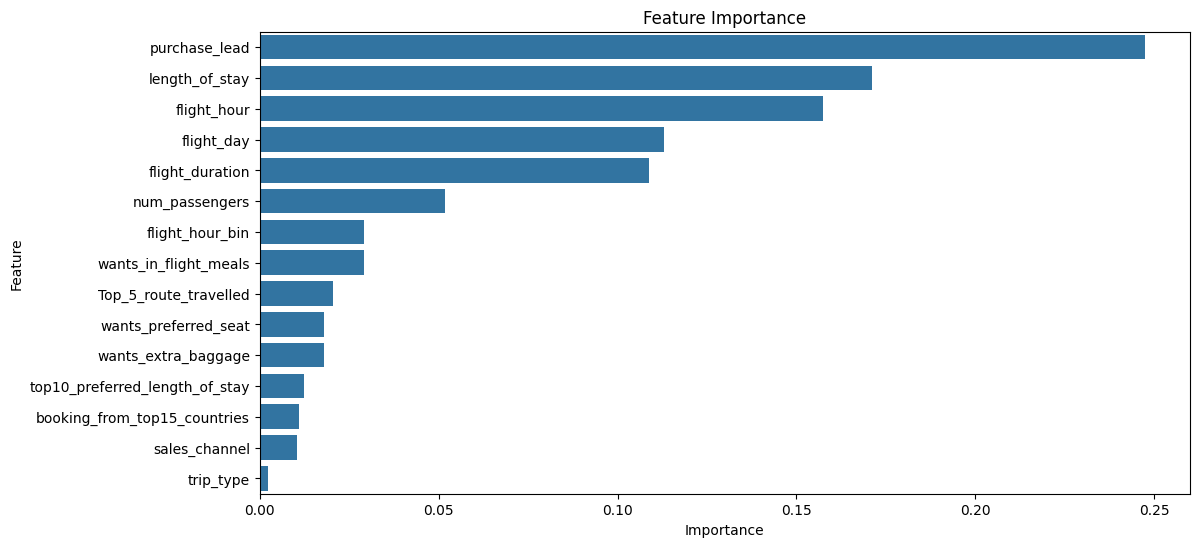

In [129]:
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [130]:
threshold = 0.02

# Filter features above the threshold
top_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Display the top features
print(top_features)

                  Feature  Importance
3           purchase_lead    0.247536
4          length_of_stay    0.171102
5             flight_hour    0.157532
6              flight_day    0.112936
10        flight_duration    0.108698
0          num_passengers    0.051730
14        flight_hour_bin    0.029151
9   wants_in_flight_meals    0.029025
12  Top_5_route_travelled    0.020354


In [152]:
features2 = [
   'purchase_lead',
    'length_of_stay','flight_hour','flight_day','flight_duration',
    'Top_5_route_travelled','wants_in_flight_meals','num_passengers'
]

In [153]:
x1=data[features2]
y1=data['booking_complete']

In [154]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [155]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train1, y_train1)

In [156]:
X_train_resampled.isna().sum()

purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
flight_duration          0
Top_5_route_travelled    0
wants_in_flight_meals    0
num_passengers           0
dtype: int64

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

In [167]:
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

In [168]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [169]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}


In [170]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(x_test1)

In [171]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.832451232420989
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91      5778
         1.0       0.23      0.14      0.17       835

    accuracy                           0.83      6613
   macro avg       0.55      0.53      0.54      6613
weighted avg       0.80      0.83      0.81      6613

Confusion Matrix:
[[5391  387]
 [ 721  114]]
